In [2]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

%matplotlib inline

## Directional Permeability Analysis

We have computed the single phase effective permeability using a finite-difference method to solve the Stokes equation on  
the generated images themselves and the original training images.

We compare here the directional values as a crossplot of effective porosity (porosity that contributes to flow)  
versus the effective permeability.

In [3]:
perms = []
phis = []

existing_rows = 0

for i in range(43, 64, 1):
    temp = []
    temp_phi = []
    found = False
    for j, direc in enumerate(["x", "y", "z"]):
        try:
            with open("../../../analysis/perms/beadpack/sampled/128/beadpack_128_"+str(i)+"_summary_calcPerm_"+str(i)+"_"+direc+".txt", "r") as f:
                for row in f:
                    split_row = row.split("\t")
                    k = float(split_row[1].split(" ")[1])
                    phi_eff = float(split_row[3].split(" ")[1])
                temp.append(k)
                temp_phi.append(phi_eff)
            found = True
        except IOError:
            print "No file", i, direc
    if found:
        perms.append(temp)
        phis.append(temp_phi)

perms = np.array(perms)            
phis = np.array(phis)


perms_sample = np.zeros((27, 3))
phis_sample = np.zeros((27, 3))
for i in range(0, 27):
    for j, direc in enumerate(["x", "y", "z"]):                
        with open("../../../analysis/perms/beadpack/original/128/beadpack_128_"+str(i)+"_summary_calcPerm_"+str(i)+"_"+direc+".txt", "r") as f:
            for row in f:
                split_row = row.split("\t")
                k = float(split_row[1].split(" ")[1])
                phi_eff = float(split_row[3].split(" ")[1])
                perms_sample[i, j] = k
                phis_sample[i, j] = phi_eff

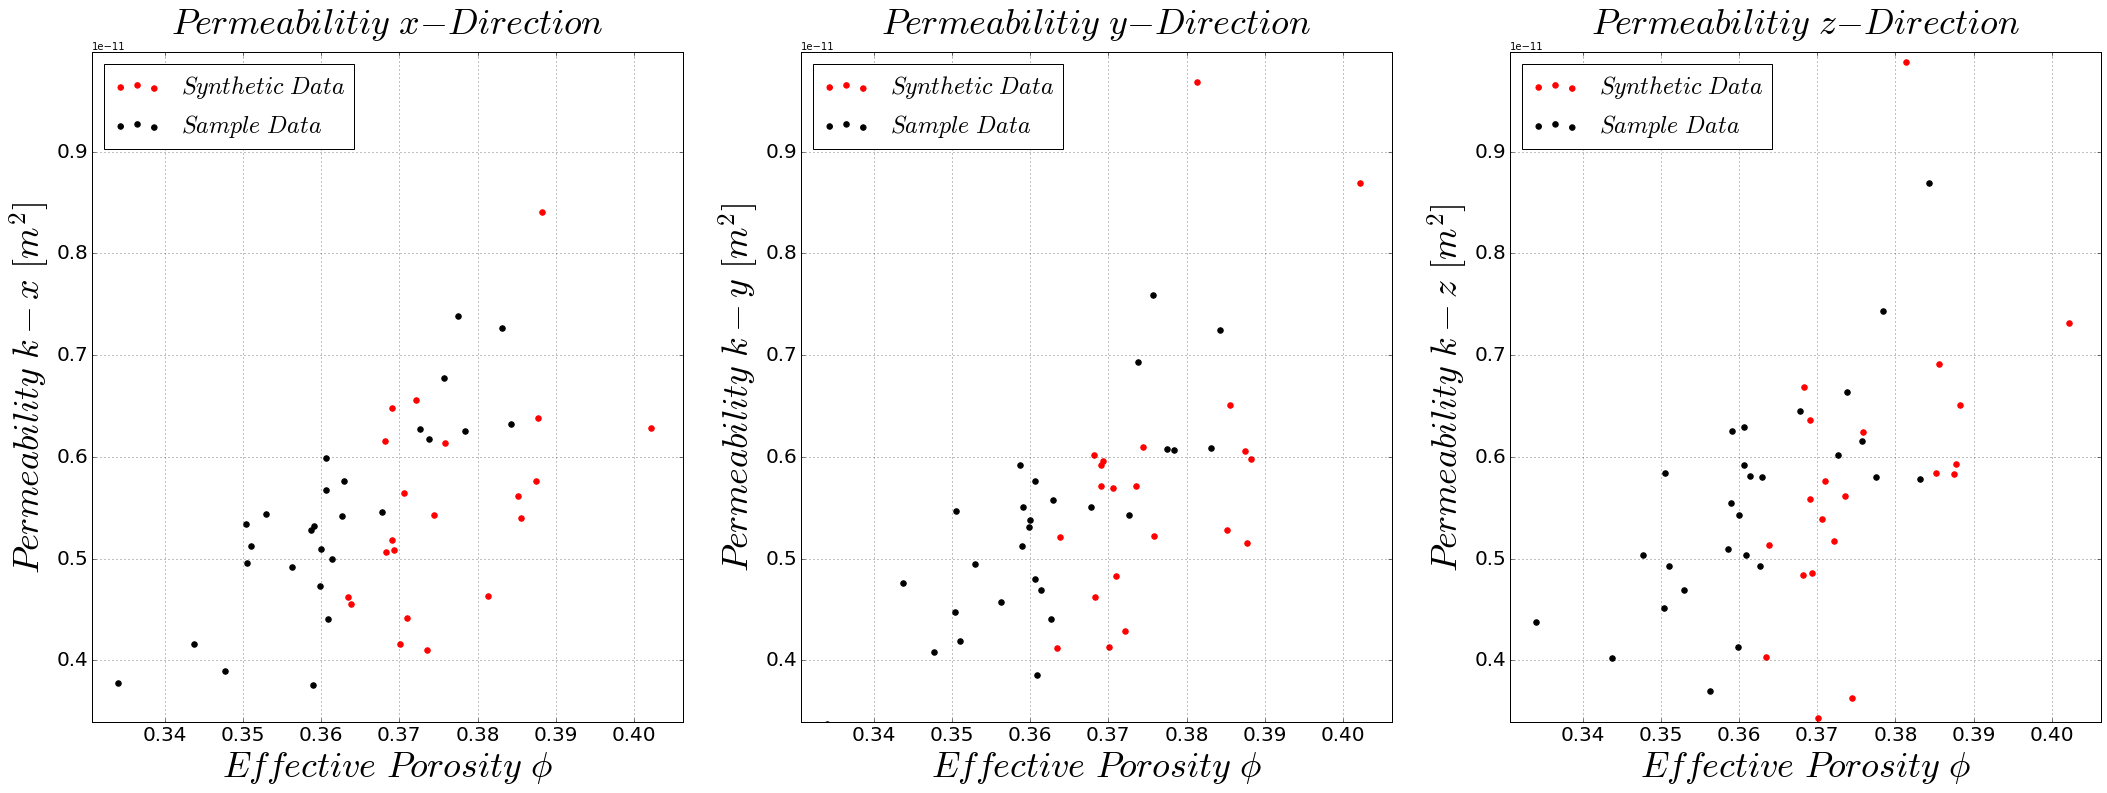

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(36, 12))
min_x, max_x = 0.2, 0.27
min_y, max_y = 1e-13, 8e-13
for i in range(phis.shape[1]):
    ax[i].scatter(phis[:, i], perms[:, i], s=30, color="red", label=r"$Synthetic \ Data$")
    ax[i].scatter(phis_sample[:, i], perms_sample[:, i], s=30, color="black", label=r"$Sample \ Data$")


    min_y, max_y = None, None
    if perms[:, i].min() < perms_sample[:, i].min():
        min_y = perms[:, i].min()
    else: 
        min_y = perms_sample[:, i].min()
    
    if perms[:, i].max() > perms_sample[:, i].max():
        max_y = perms[:, i].max()
    else: 
        max_y = perms_sample[:, i].max()
        
    min_x, max_x = None, None
    if phis[:, i].min() < phis_sample[:, i].min():
        min_x = phis[:, i].min()
    else: 
        min_x = phis_sample[:, i].min()
    
    if phis[:, i].max() > phis_sample[:, i].max():
        max_x = phis[:, i].max()
    else: 
        max_x = phis_sample[:, i].max()
    
    
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        
for j, direc in enumerate([r"$x$", r"$y$", r"$z$"]):
    ax[j].set_xlim(0.99*min_x, 1.01*max_x)
    ax[j].set_ylim(0.99*min_y, 1.01*max_y)
    ax[j].set_title(r"$Permeabilitiy \ $"+direc+r"$-Direction$", fontsize=36, y=1.02) 
    ax[j].set_xlabel(r"$Effective \ Porosity \ \phi$", fontsize=36)
    ax[j].set_ylabel(r"$Permeability \ k-$"+direc+r"$ \ [m^2]$", fontsize=36)       
    ax[j].grid()
    ax[j].legend(fontsize=24, loc=2)
    
fig.savefig("../../../paper/figures/permeability_crossplot_beadpack_dcgan_128.png", dpi=72)

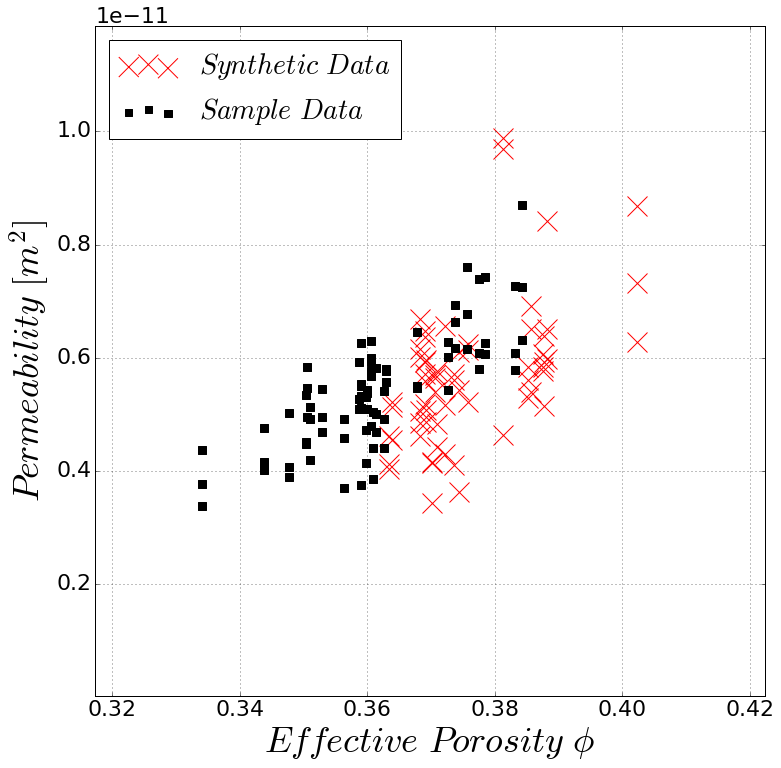

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
x_synth = phis.flatten()
y_synth = perms.flatten()

x_sample = phis_sample.flatten()
y_sample = perms_sample

ax.scatter(x_synth, y_synth, s=400, color="red", label=r"$Synthetic \ Data$", marker="x")
ax.scatter(x_sample, y_sample, s=50, color="black", label=r"$Sample \ Data$", marker="s")

min_y, max_y = None, None
if y_synth.min() < y_sample.min():
    min_y = y_synth.min()
else: 
    min_y = y_sample.min()

if y_synth.max() > y_sample.max():
    max_y = y_synth.max()
else: 
    max_y = y_sample.max()

min_x, max_x = None, None
if x_synth.min() < x_sample.min():
    min_x = x_synth.min()
else: 
    min_x = x_sample.min()

if x_synth.max() > x_sample.max():
    max_x = x_synth.max()
else: 
    max_x = x_sample.max()
    
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(22)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22)
        
ax.set_xlim(0.95*min_x, 1.05*max_x)
ax.set_ylim(0.01*min_y, 1.2*max_y)
#ax.set_title(r"$Permeabilitiy \ $"+direc+r"$-Direction$", fontsize=36, y=1.02) 
ax.set_xlabel(r"$Effective \ Porosity \ \phi$", fontsize=36)
ax.set_ylabel(r"$Permeability \ [m^2]$", fontsize=36)       
ax.grid()
ax.legend(fontsize=28, loc=2)
ax.yaxis.get_offset_text().set_fontsize(22)    
fig.savefig("../../../paper/figures/permeability_crossplot_beadpack_dcgan_128_single.png", dpi=72)